In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
# 한글 폰트(NanumGothic) 설치
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

# Matplotlib의 기본 폰트 설정
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# NanumGothic 폰트 경로 확인 및 적용
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=12)

# Matplotlib의 폰트 캐시 삭제 후 업데이트
fm.fontManager.addfont(font_path)  # 폰트 추가
plt.rc("font", family="NanumGothic")

print("한글 폰트 설정 완료!")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
한글 폰트 설정 완료!


In [ ]:
terror_1990 = pd.read_csv('/content/globalterrorism_1990.csv')

<ipython-input-34-e2379126f682>:1: DtypeWarning: Columns (4,6,33,61,62,63,76,79,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terror_1990 = pd.read_csv('/content/globalterrorism_1990.csv')


In [ ]:
columns_to_keep = [
     'eventid',
    'iyear', 'imonth', 'iday',
    'success',
    'country_txt', 'region_txt', 'provstate',
    'latitude', 'longitude',
    'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'weaptype1_txt',
    'nkill', 'nwound', 'city',
    'gname'
]

# 해당 컬럼만 선택
terror = terror_1990[columns_to_keep]

# 가설 1 : 시간에 흐름에 따라 기술의 발전과 대응 매뉴얼 구비로 테러 성공률이 낮아질 것이다.

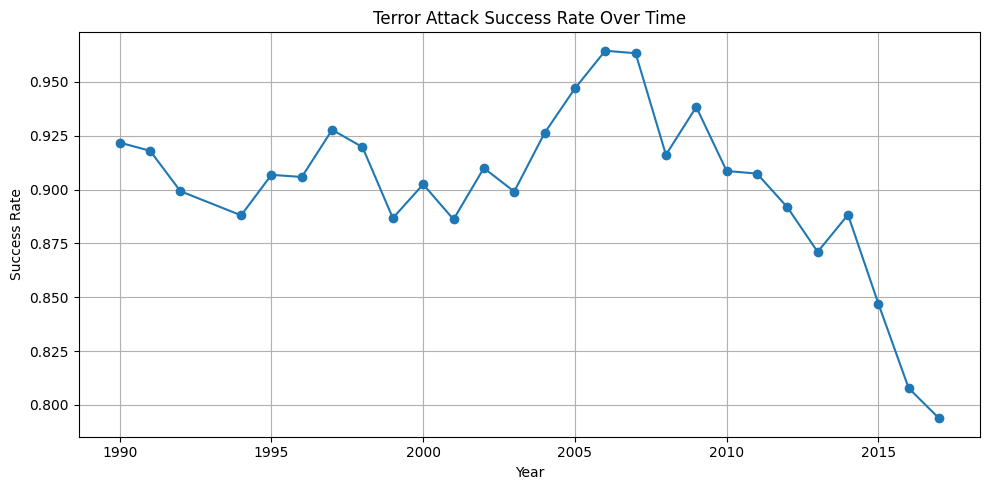

In [ ]:
# 가설 1: 시간 흐름에 따른 테러 성공률 변화
# 연도별 성공률 계산
success_by_year = terror.groupby('iyear')['success'].mean()

# 시각화 - 연도별 성공률 변화
plt.figure(figsize=(10, 5))
success_by_year.plot(marker='o')
plt.title('Terror Attack Success Rate Over Time')
plt.ylabel('Success Rate')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()



*   시간이 흐름에 따라 성공률이 낮아지는 것을 확인
*   년도별 공격유형을 분석



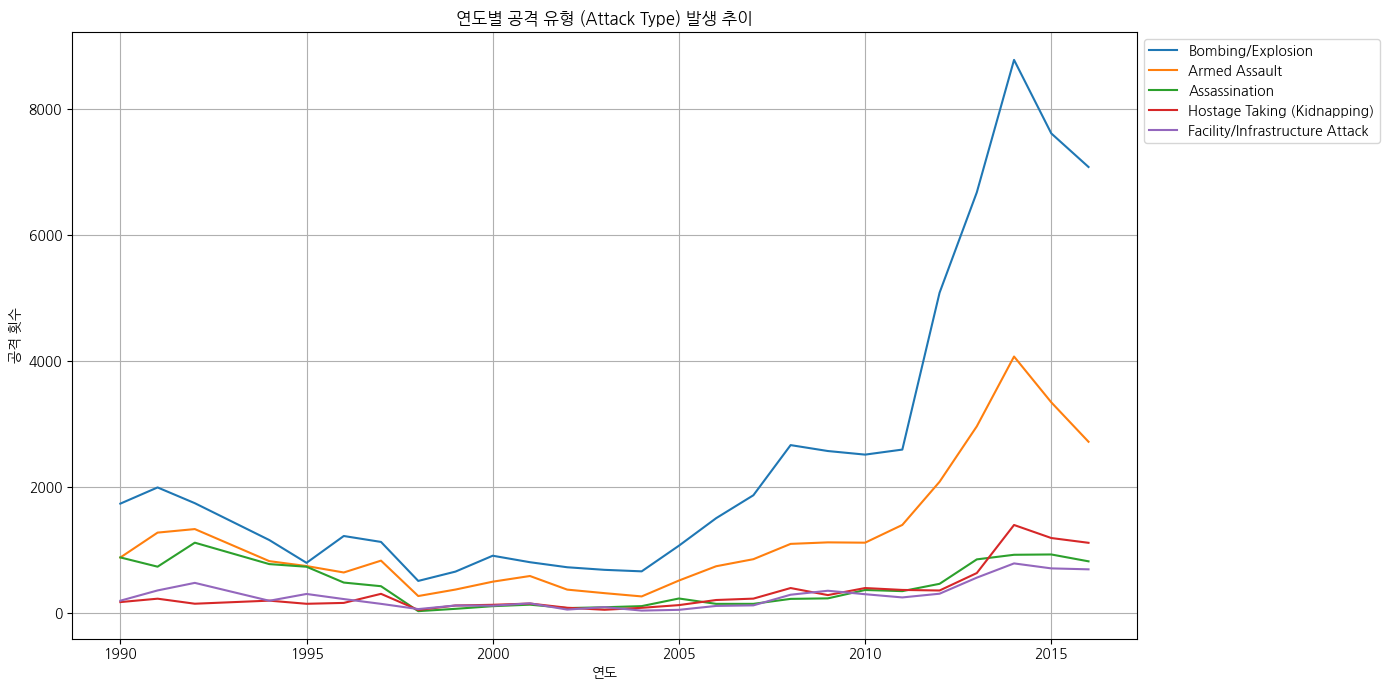

In [ ]:
# 연도별 attacktype1_txt 건수 집계
attack_count_by_year = terror.groupby(['iyear', 'attacktype1_txt']).size().unstack(fill_value=0)

# 상위 공격유형만 필터 (전체 수가 많은 유형 위주로)
top_types = terror['attacktype1_txt'].value_counts().head(5).index.tolist()
attack_count_by_year_top = attack_count_by_year[top_types]

# 그래프 출력
plt.figure(figsize=(14, 7))
for column in attack_count_by_year_top.columns:
    plt.plot(attack_count_by_year_top.index, attack_count_by_year_top[column], label=column)

plt.title("연도별 공격 유형 (Attack Type) 발생 추이")
plt.xlabel("연도")
plt.ylabel("공격 횟수")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid(True)
plt.show()



*   년도가 지날 수록 폭탄, 무장공격, 인질극 유형의 공격이 증가함을 확인
*   공격유형별 성공률을 년도에 따라 분석



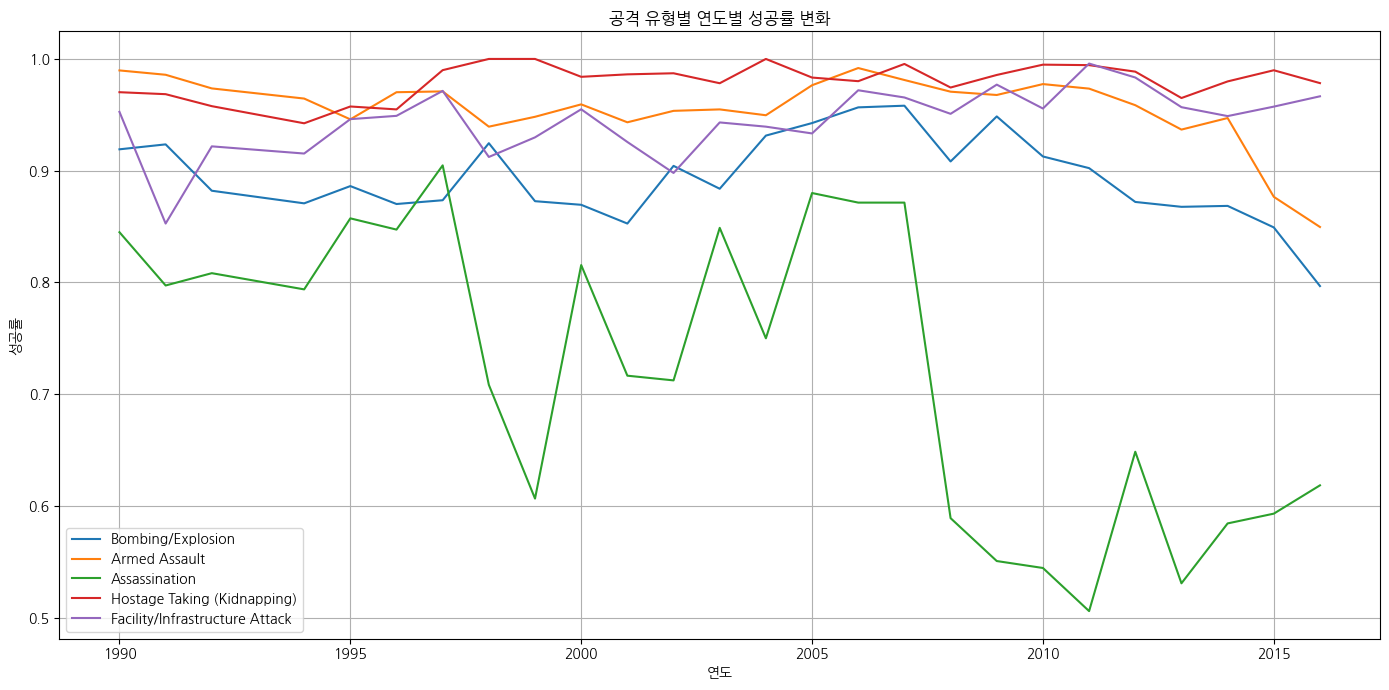

In [ ]:
# 연도-공격유형별 성공률 계산
success_by_year_type = terror.groupby(['iyear', 'attacktype1_txt'])['success'].mean().unstack()

# 상위 공격유형만 필터 (전체 수가 많은 유형 위주로)
top_types = terror['attacktype1_txt'].value_counts().head(5).index.tolist()
success_by_year_type_top = success_by_year_type[top_types]

# 시각화
plt.figure(figsize=(14, 7))
for col in success_by_year_type_top.columns:
    plt.plot(success_by_year_type_top.index, success_by_year_type_top[col], label=col)

plt.title("공격 유형별 연도별 성공률 변화")
plt.xlabel("연도")
plt.ylabel("성공률")
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()



*   폭탄, 무장공격, 인질극의 성공률이 떨어지는 것을 확인
*   폭탄, 무장공격, 인질극의 빈도 수가 많아지는 것과 반대로 성공률은 낮아지고 있어 전체적인 성공률이 낮아진다고 볼 수 있다.




1.   시민들의 경각심 상승으로 투철한 신고정신이 발달함
2.   공항, 기차역, 대형 행사장 등 주요 시설의 검색 시스템이 고도화되어 X-ray, 화학 센서, AI 기반 CCTV 등으로 폭발물 탐지가 빨라짐.









# 가설 2 : 종교에 따른 테러 위험성

In [ ]:
# GTI score(국가별 테러 위험도 데이터)
GTI_rank = pd.read_csv('/content/gti_2016_rank_1_to_130_complete.csv')

In [ ]:
# GTI_score가 4 이상인 국가들 정리
high_GTI = GTI_rank[GTI_rank["GTI_Score"] >= 4].reset_index(drop=True)

In [ ]:
# 나라별 종교 데이터
religion = pd.read_csv('/content/flags.csv', sep=";")

In [ ]:
religion = religion[["name", "religion"]].copy()

In [ ]:
# 종교 코드 매핑 딕셔너리
religion_map = {
    0: "Catholic",
    1: "Other Christian",
    2: "Muslim",
    3: "Buddhist",
    4: "Hindu",
    5: "Ethnic",
    6: "Marxist",
    7: "Others"
}

religion["religion"] = religion["religion"].map(religion_map)
religion

,name,religion
0,Afghanistan,Muslim
1,Albania,Marxist
2,Algeria,Muslim
3,American-Samoa,Other Christian
4,Andorra,Catholic
...,...,...
188,Western-Samoa,Other Christian
189,Yugoslavia,Marxist
190,Zaire,Ethnic
191,Zambia,Ethnic


In [ ]:
# 먼저 국가명이 일치하는 것만 병합
merged_religion_gti = high_GTI.merge(religion, left_on="Country", right_on="name", how="left")

# 결측치 채우기
merged_religion_gti.loc[5, "religion"] = "Muslim"
merged_religion_gti.loc[10, "religion"] = "Other Christian"
merged_religion_gti.loc[18, "religion"] = "Other Christian"
merged_religion_gti.loc[25, "religion"] = "Muslim"
merged_religion_gti.loc[27, "religion"] = "Other Christian"
merged_religion_gti.loc[29, "religion"] = "Muslim"
merged_religion_gti.loc[31, "religion"] = "Other Christian"
merged_religion_gti.loc[33, "religion"] = "Other Christian"
merged_religion_gti.loc[38, "religion"] = "Catholic"
merged_religion_gti.loc[42, "religion"] = "Buddhist"

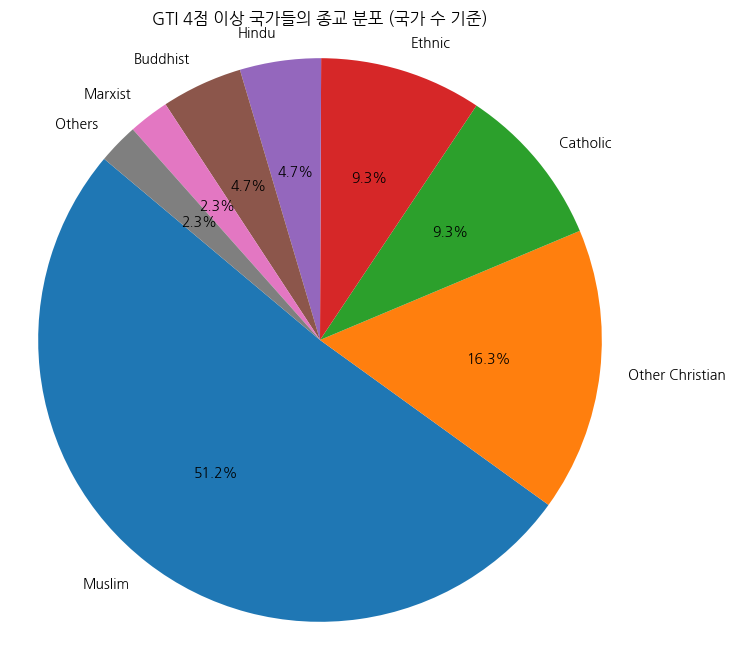

In [ ]:
# 종교별 국가 수
religion_counts = merged_religion_gti["religion"].value_counts()

# 파이차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(religion_counts, labels=religion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("GTI 4점 이상 국가들의 종교 분포 (국가 수 기준)")
plt.axis("equal")
plt.show()

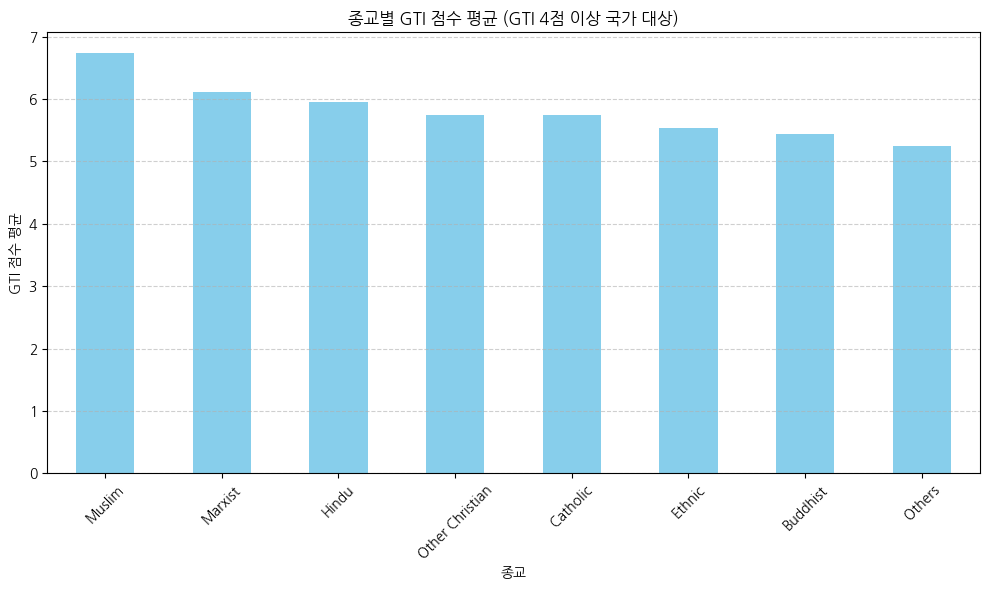

In [ ]:
# 종교별 GTI 점수 평균 계산
avg_gti_by_religion = merged_religion_gti.groupby("religion")["GTI_Score"].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
avg_gti_by_religion.plot(kind="bar", color="skyblue")
plt.title("종교별 GTI 점수 평균 (GTI 4점 이상 국가 대상)")
plt.xlabel("종교")
plt.ylabel("GTI 점수 평균")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# 국가별 사건 수 정렬
country_counts = terror['country_txt'].value_counts()

# 상위 20개 국가 출력
country_counts.head(20)

,count
country_txt,
Iraq,22094
Pakistan,13421
Afghanistan,11280
India,9726
Philippines,5170
Colombia,4793
Thailand,3568
Somalia,3464
Nigeria,3412


In [ ]:
refugee = pd.read_csv('/content/refugees_1990_2023_fr_uk_tr_us.csv')

In [ ]:
refugee

,Year,France,United Kingdom,Turkey,USA
0,1990,64901,84676,154245,59718
1,1991,58579,25950,109292,56537
2,1992,94885,71417,366330,86373
3,1993,133872,8937,648887,113939
4,1994,93884,30457,518868,169009
5,1995,106612,78784,864999,128267
6,1996,173740,97608,343401,141362
7,1997,162113,83171,965709,142009
8,1998,137733,77136,961541,97285
9,1999,180822,74148,1009694,164659


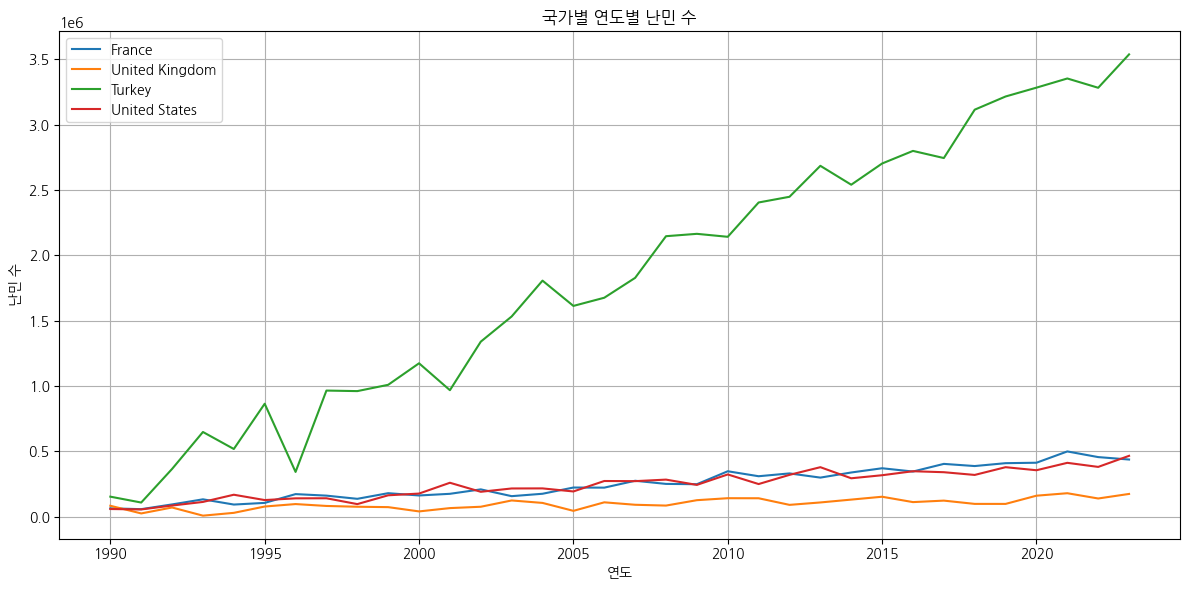

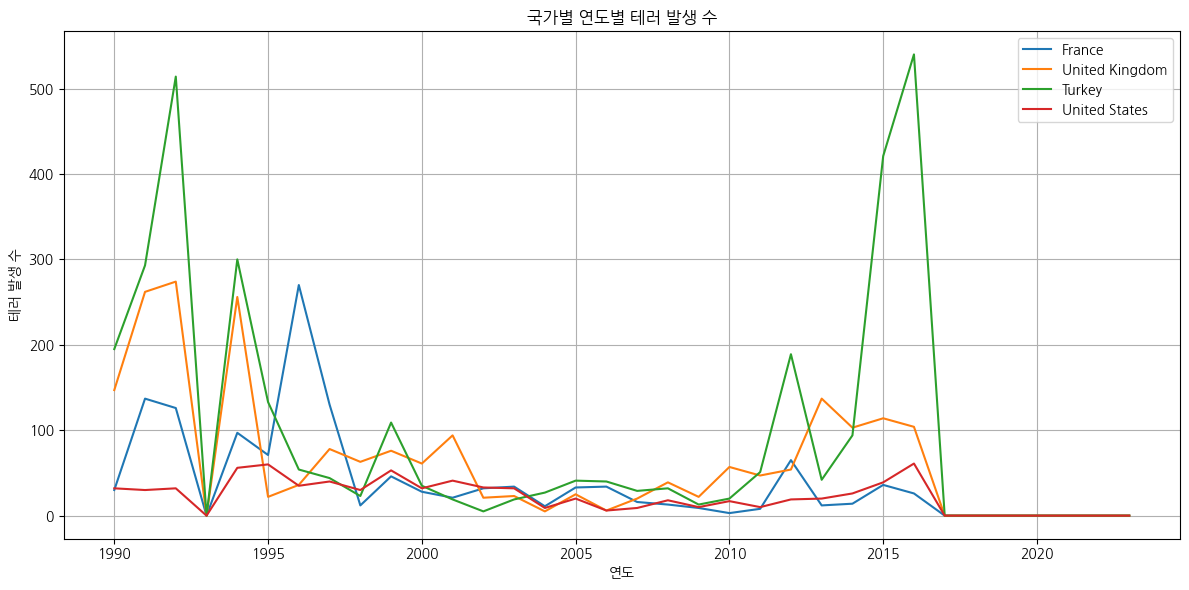

In [ ]:
# 1. 테러 연도-국가별 사건 수 집계
terror_by_country_year = (
    terror[terror['country_txt'].isin(['France', 'United Kingdom', 'Turkey', 'United States'])]
    .groupby(['iyear', 'country_txt'])
    .size()
    .reset_index(name='Terror_Attacks')
    .rename(columns={'iyear': 'Year', 'country_txt': 'Country'})
)

# 국가명 일치 처리
refugee_renamed = refugee.rename(columns={"USA": "United States"})
refugee_melted = refugee_renamed.melt(id_vars='Year', value_vars=['France', 'United Kingdom', 'Turkey', 'United States'],
                                      var_name='Country', value_name='Refugees')

# 병합
merged_country = pd.merge(refugee_melted, terror_by_country_year, on=['Year', 'Country'], how='left').fillna(0)

# 그래프 1: 국가별 난민 수
plt.figure(figsize=(12, 6))
for country in merged_country['Country'].unique():
    data = merged_country[merged_country['Country'] == country]
    plt.plot(data['Year'], data['Refugees'], label=country)
plt.title('국가별 연도별 난민 수')
plt.xlabel('연도')
plt.ylabel('난민 수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 그래프 2: 국가별 테러 수
plt.figure(figsize=(12, 6))
for country in merged_country['Country'].unique():
    data = merged_country[merged_country['Country'] == country]
    plt.plot(data['Year'], data['Terror_Attacks'], label=country)
plt.title('국가별 연도별 테러 발생 수')
plt.xlabel('연도')
plt.ylabel('테러 발생 수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



1990~1995년 튀르키예의 테러들


1.   PKK(쿠르드노동자당)와 터키 정부 간의 내전급 충돌


*   1984년부터 PKK의 무장 독립 투쟁이 본격화되었슴
*   1990년대는 무력 충돌이 가장 심화된 시기로, 하루 수차례 테러가 발생할 정도였음


2.  동남부 지역의 분리주의 활동 확대


*   쿠르드인 다수 지역(디야르바크르, 시르나크 등)에서 지속적인 공격과 보복이 이어짐






2015년 튀르키예의 테러 급증


1.   ISIS의 국경 확산


*   시리아 내전의 격화로 인해, IS가 터키 국경까지 영향력 확대.
*   터키 국내로 유입된 세력에 의해 폭탄 테러 빈발.


2.  쿠르드 분리주의 단체(PKK)와의 갈등 재점화


*   2015년 7월 휴전이 깨지고, 터키 정부 vs PKK 무력 충돌 본격화.


3. 앙카라·수루치 테러 사건

*   유명한 사례: 2015년 10월 앙카라 기차역 자살 폭탄 테러, 사망자 100명 이상
*   IS 추정 테러리스트들이 민간인 집회를 노렸음









In [ ]:
# 국가 이름 통일
country_map = {
    'USA': 'United States',
    'United Kingdom': 'United Kingdom',
    'Turkey': 'Turkey',
    'France': 'France'
}
refugee = refugee.rename(columns={'USA': 'United States'})

# 연도-국가별 테러 수 집계
target_countries = ['France', 'United Kingdom', 'Turkey', 'United States']
terror_grouped = (
    terror[terror['country_txt'].isin(target_countries)]
    .groupby(['iyear', 'country_txt'])
    .size()
    .reset_index(name='Terror_Attacks')
    .rename(columns={'iyear': 'Year', 'country_txt': 'Country'})
)

# 난민 데이터를 melt 형식으로 변환
refugee_melted = refugee.melt(id_vars='Year', value_vars=target_countries,
                                 var_name='Country', value_name='Refugees')

# 두 데이터 병합
merged = pd.merge(refugee_melted, terror_grouped, on=['Year', 'Country'], how='inner')

# 상관계수 계산
from scipy.stats import pearsonr

correlation_results = []
for country in target_countries:
    subset = merged[merged['Country'] == country]
    if len(subset) > 1:
        corr, pval = pearsonr(subset['Refugees'], subset['Terror_Attacks'])
        correlation_results.append({
            'Country': country,
            'Correlation': corr,
            'P-value': pval
        })

correlation_df = pd.DataFrame(correlation_results)

print(correlation_df)

          Country  Correlation   P-value
0          France    -0.429043  0.028733
1  United Kingdom    -0.407339  0.038883
2          Turkey    -0.055792  0.786619
3   United States    -0.286373  0.156099


난민 수용이 테러의 발생률을 높인다는 편견이 틀린 것을 의미